# 7. Naive Bayes
### Agenda
0. Generative vs Discriminative Models
1. Introduction Bayes' Theorem
2. Maximum Likelihood Estimate
3. Naive Bayes Classifier
4. Gaussian Naive Bayes
5. Multinomial Naive Bayes
5. Burnolis' Naive Bayes
6. Naive Bayes for out-of-core 

## Discriminative vs Generative

![](img/7-generative-vs-discriminative-01.jpg)

## 7.1 Introduction to Naive Bayes
* The Naive Bayes Classifier technique is based on the Bayesian theorem and is particularly suited when then high dimensional data. 
* It's simple & out-performs many sophisticated methods
* Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|h) and so on.
* The above assumption is very strong & not true for in real situations, still naive bayes works quite well

#### 7.1.1 Class Probabilities
* For Bi-class classification, P(Class 1) = Count(Class 1) / Count( Class 1 + Class 2)

#### 7.1.2 Conditional Probabilities
* Frequency of each attribute value for each class
* Consider a dataset with attribute - weather ( values - sunny & rainy ). Target - Sports ( values - chess & tennis )
* P(weather=sunny|target=tennis) = Count ( weather=sunny & target=tennis ) / Count ( target=tennis )
![](img/venn-diagram-01.jpg)

## 7.2 Naive Bayes' Classifier
* Formula : Prediction = Max(P(feature|h).P(h))
* Let's predict for a new data (weather=sunny)
* Possibility of tennis = P(weather=sunny|target=tennis) . P(target=tennis)
* Possibility of chess = P(weather=sunny|target=chess) . P(target=chess)
* We choose the possibility with higher values
* Normalize the value to bring it to scale of 0 to 1

#### More features
* In case, we add more feature like skill (values - low,moderate,high)
* Our probability becomes, P(weather=sunny|target=tennis).P(skill=moderate|target=tennis).P(target=tennis)

### 7.2.1 Gaussian Naive Bayes
* The above fundamental example is for categorical data
* We can use Naive Bayes for continues data as well
* Assumption is data should be of Gaussian Distribution
* Let's understand a bit about Gaussian PDF

$$P(x|\mu,\sigma) = g_{\mu,\sigma}(x) = \cfrac{1}{\sqrt{2\pi\sigma^2}}e^{-\cfrac{(x-\mu)^2}{2\sigma^2}}$$

![](img/7-gaussian-01.jpg)
* Possibility of tennis = P(pdf(precipitation)|class=tennis) . P(pdf(windy)|class=tennis) . P(class=tennis
* Prior probability can be configured. By default, each class is assigned equal probability
#### Temperature Distribution
The distribution of temperature in city can be a good example of Gaussian Distribution. 
![](img/7-temperature-distribution-01.jpg)  
Taking the above Temperature Distribution Example, let us try to understand the two fundamental terms in Bayesian Inference.  
1. **Likelihood** ($P(X|\mu,\sigma)$) : How likely is the data generated from this guassian.This is given by $ \Pi_{i=0}^{N} g(x_i)$ which is joing probability.
2. **Posterior**  ($P(\mu,\sigma|X)$)  : How likely is the gaussian with $\mu$ mean representative of data's distribution. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
gnb = GaussianNB()

In [7]:
gnb.fit(df,iris.target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
gnb.score(df,iris.target)

0.96

### Multinomial Naive Bayes
* Suited for classification of data with discrete features ( count data )
* Very useful in text processing
* Each text will be converted to vector of word count
* Cannot deal with negative numbers
![](img/7-movie-review-01.jpg)

## Amazon Food Review Sentiment Prediction

In [4]:
food_review = pd.read_csv('C:\\Users\\jaley\\git\\AI102-MachineLearning\\data\\reviews.csv')

In [5]:
food_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
columns = ['Text','Score']
food_review[columns].head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [7]:
review_data = food_review[['Text','Score']]

In [8]:
review_data = review_data[review_data.Score != 3]

In [9]:
review_data['Sentiment'] = review_data.Score.map(lambda s:0 if s < 3 else 1)

In [10]:
review_data.drop('Score',axis=1,inplace=True)

In [11]:
review_data.head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [12]:
review_data.Sentiment.value_counts()

1    443777
0     82037
Name: Sentiment, dtype: int64

In [13]:
review_data = review_data.sample(10000)

#### Remove punchuations

In [14]:
from nltk.tokenize import RegexpTokenizer

In [15]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [17]:
review_data['Text'] = review_data.Text.map(lambda x:tokenizer.tokenize(x))

In [18]:
review_data.Text

230837    [Haven, t, bought, this, online, just, at, the...
272358    [If, you, have, never, tried, it, you, must, I...
515179    [I, found, this, brand, in, my, local, grocery...
529006    [I, bought, these, for, my, friend, in, the, U...
154693    [My, son, has, been, using, Prilosec, for, at,...
367246    [I, picked, up, a, box, of, Special, K, red, b...
531731    [I, love, this, coffee, It, is, wonderful, smo...
439844    [Excellent, item, loved, by, both, my, fussy, ...
532916    [I, love, PB, It, tastes, just, like, peanut, ...
474071    [The, white, tea, blended, w, the, green, take...
93923     [My, english, bulldogs, love, these, cookies, ...
311536    [My, dogs, like, these, the, best, and, I, m, ...
557166    [I, bought, the, Kettle, Corn, variety, Pop, U...
225998    [Very, Very, overpriced, Starbucks, K, Cup, fo...
205138    [After, trying, a, few, different, treats, for...
100424    [BLEND, this, for, a, Great, Smooth, cup, of, ...
53279     [From, a, former, Dr, Pepper, 

#### Stemming
A **root** is a form which is not further analysable In the form ‘untouchables’ the root is ‘touch’, to which first the suffix ‘-able’, then the prefix ‘un-‘ and finally the suffix ‘-s’ have been added. In a compound word like ‘wheelchair’ there are two roots, ‘wheel’ and ‘chair’.
![](img/7-word-dissection.png)
**Derivational Morphology** Derivational morphology results in the creation of a new word with a new meaning ![](img/7-derivational.png)
 
**Inflictional Morphology** In contrast, inflectional morphology involves an obligatory grammatical specification 
![](img/7-inflictional.png)

A **stem** is of concern only when dealing with **inflectional morphology**.(which doesn't change the core meaning)
In the form *‘untouchables’* the stem is *‘untouchable’*, although in the form *‘touched’* the stem is *‘touch’*; in the form *‘wheelchairs’* the stem is *‘wheelchair’*, even though the stem contains two roots('wheel' and 'chair').



In [19]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [20]:
review_data['Text'] = review_data.Text.map(lambda l: [stemmer.stem(word) for word in l])

In [21]:
review_data.Text = review_data.Text.str.join(sep=' ')

#### Preprocessing

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer(stop_words='english')

In [24]:
review_data_tf = cv.fit_transform(review_data.Text)

In [25]:
print (review_data_tf.shape)

(10000, 13154)


#### Splitting data into train_test

In [28]:
from sklearn.model_selection import train_test_split;
trainX,testX,trainY,testY = train_test_split(review_data_tf,review_data.Sentiment)

#### Create Model

In [29]:
review_data.Sentiment.value_counts()

5    8471
0    1529
Name: Sentiment, dtype: int64

* Class Imbalanced
* Two ways to handle this - dealing with data, dealing with algo

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
mnb = MultinomialNB(class_prior=[.25,.75])

In [32]:
mnb.fit(trainX,trainY)

MultinomialNB(alpha=1.0, class_prior=[0.25, 0.75], fit_prior=True)

In [33]:
mnb.class_prior

[0.25, 0.75]

In [34]:
y_pred = mnb.predict(testX)

In [38]:
mnb.score(testX,testY)

0.8924

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_true=testY, y_pred=y_pred)
# Rows corrospond to the actual classes
# Collumns corrospond to the predicted classes

array([[ 203,  180],
       [  89, 2028]], dtype=int64)

### Bernoulli's Naive Bayes
* Like MultinomialNB, this classifier is suitable for discrete data.
* The difference is that while MultinomialNB works with occurrence counts
* BernoulliNB is designed for binary/boolean features.
* If data is not binary, internally Binarization preprocessing will happen
* Can deal with negative numbers

In [41]:
from sklearn.datasets import make_classification

In [44]:
X, Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)

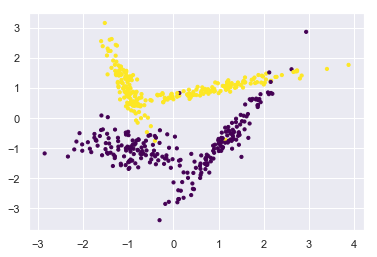

In [45]:
plt.scatter(X[:,0],X[:,1],c=Y,s=10, cmap='viridis')

In [52]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler;

In [53]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
trainX,testX,trainY,testY = train_test_split(X,Y)

In [58]:
bnb = BernoulliNB(binarize=0.5)
mnb = MultinomialNB()

In [59]:
bnb.fit(trainX, trainY)
mnb.fit(trainX, trainY)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
bnb.score(testX,testY)

0.928

In [61]:
mnb.score(testX,testY)

0.704

In [62]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [69]:
Z = bnb.predict(np.c_[xx.flatten(), yy.flatten()])

In [67]:
Z = Z.reshape(xx.shape)

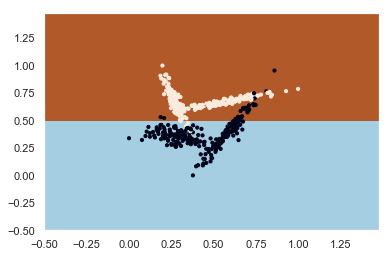

In [68]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

### Out-of-core training
* Naive Bayes supports partial_fit function
* For data which cannot be fit to RAM, we can use partial_fit function to gradually train the model

In [70]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [71]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

* HashingVectorizer is suited for large data, since it doesn't maintain state

In [108]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(decode_error='ignore', n_features=2 ** 12,
                               alternate_sign=False)
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(stop_words="english")

In [109]:
review_data_chunks = pd.read_csv('C:\\Users\\jaley\\git\\AI102-MachineLearning\\data\\reviews.csv', chunksize=10000)

In [110]:
test = pd.read_csv('C:\\Users\\jaley\\git\\AI102-MachineLearning\\data\\reviews.csv').sample(5000)

In [111]:
test = test[['Text','Score']]
test = test[test.Score != 3]
test['Sentiment'] = test.Score.map(lambda s:0 if s < 3 else 1)
test.Text = test.Text.map(lambda x:tokenizer.tokenize(x))
test.Text = test.Text.map(lambda l: [stemmer.stem(word) for word in l])
test.Text = test.Text.str.join(sep=' ')
test_tf = vectorizer.transform(test.Text)

In [112]:
mnb = MultinomialNB(class_prior=[.22,.78])

* Taking chunk of data each time & fitting the model & gradually improving it

In [113]:
for idx,review_data in enumerate(review_data_chunks):
    print ('iter : ',idx)
    review_data = review_data[['Text','Score']]
    review_data = review_data[review_data.Score != 3]
    review_data['Sentiment'] = review_data.Score.map(lambda s:0 if s < 3 else 1)
    review_data.Text = review_data.Text.map(lambda x:tokenizer.tokenize(x))
    review_data.Text = review_data.Text.map(lambda l: [stemmer.stem(word) for word in l])
    review_data.Text = review_data.Text.str.join(sep=' ')
    text_tf = vectorizer.transform(review_data.Text)
    mnb.partial_fit(text_tf,review_data.Sentiment,classes=[0,1])
    y_pred = mnb.predict(test_tf)
    print (confusion_matrix(y_pred=y_pred, y_true=test.Sentiment))

iter :  0
[[   0  681]
 [   0 3967]]
iter :  1
[[   4  677]
 [   0 3967]]
iter :  2
[[  13  668]
 [   0 3967]]
iter :  3
[[  18  663]
 [   1 3966]]
iter :  4
[[  24  657]
 [   1 3966]]
iter :  5
[[  29  652]
 [   1 3966]]
iter :  6
[[  33  648]
 [   1 3966]]
iter :  7
[[  35  646]
 [   2 3965]]
iter :  8
[[  35  646]
 [   1 3966]]
iter :  9
[[  33  648]
 [   2 3965]]
iter :  10
[[  35  646]
 [   2 3965]]
iter :  11
[[  38  643]
 [   1 3966]]
iter :  12
[[  39  642]
 [   1 3966]]
iter :  13
[[  37  644]
 [   1 3966]]
iter :  14
[[  42  639]
 [   1 3966]]
iter :  15
[[  42  639]
 [   1 3966]]
iter :  16
[[  40  641]
 [   1 3966]]
iter :  17
[[  42  639]
 [   1 3966]]
iter :  18
[[  41  640]
 [   1 3966]]
iter :  19
[[  41  640]
 [   1 3966]]
iter :  20
[[  42  639]
 [   1 3966]]
iter :  21
[[  42  639]
 [   1 3966]]
iter :  22
[[  42  639]
 [   1 3966]]
iter :  23
[[  43  638]
 [   1 3966]]
iter :  24
[[  41  640]
 [   1 3966]]
iter :  25
[[  41  640]
 [   1 3966]]
iter :  26
[[  42  639

KeyboardInterrupt: 

In [89]:
print (review_data_chunks.shape)

NameError: name 'review_data_chucks' is not defined

* As we can see, model keeps improving
* Next step would be to use sampling techniques to improve further accuracy

![](img/questions-01.png)

# 1. Conceptual Questions

1. Explain the bellow terms in 1 line :  
  a. Universal Set  
  b. Mutually Exclusive Events  
  c. Independent Events  
  d. Conditional Probability  
  e. Conditionally Independent Events  
  f. Bayes Theorem  
  g. Prior, Likelihood, Posterior Probability  
  h. Hypothesis and Evidence for Likelihood and Posterior Probability 
  i. Joint Probability Distribution(for independent and non independent events)  
  

2. Prove that :  $\textsf{P(h|x)p(x)=P(x|h)P(h)}$
  
3. Predict the probability Distribution to be used to model the following events  
  a. Single Coin Tossing Event  
  b. Number of heads for n coin tosses
  c. If I take 1 hour to go from Koramangala to Marathalli, What is the probability that I will reach in 1 hour 15 minutes? 
  d. If I am tossing a coin with bias p=0.8(probability of taking a trip) to decide if I want to go for a trip. How likely is it that I would have 8 trips out of 10 coin tosses?  
  e. If I am working with french artist who uses blue twice as much as red,green. Then what is the probability that he will pick (red=1,blue=2,green=1) 5 times out of 100 color picks.  

4. I went to Las Vegas from bangaluru for my research conference and went to Belligro Casino, there we saw a machine which gives us money if it shows thumbs up, else it takes back the same amount of money back. The bias of machine starts to change after a point so that we go in loss. Find out a way to estimate the bias of the machine. Can you relate this problem to conjugate prior problem for Beta-Bernoilli pair?

5. If I have to design a machine which shows ads randomly based on user demend(visitation). There are five product catagories for which I want to pick an ad based on the demand. Find out a way to create such a recommender system using Dirichlet-Gamma Conjugate Prior.

6. What is the ideological difference between Generative and Discriminative Models.

7. What is Markovian Property in the markov Chain. Explain it with example of temporal habbits that we form.

8. What is the hypothesis for Gaussian Bayesian Estimate

9. What is a categorical Distribution. Is it different from Binomial Distrbution? Explain.

10. If I were to represent a 5 text documents as an outcome of Multinomial Distribution, explain the catagories in dimension. 

11. What is a multivariate Bernoulli Distribution? What is joint probability in that case? Explain the multivariate bernoulli version of sentiment analysis  

12. Which Naive bayes algorithm should you use for the bellow case :   
  a. Spam-Non-Spam Classification  
  b. Document Classification   
  c. Identify Spamy/erroneous Bit pattern    
  d. Sentiment analysis of twitter feed  
  e. Dynamic Recommender System  
  
